In [1]:
import numpy as np

import euclidlike as eul

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
ccd_center = eul.euclidlike_wcs.ccd_data
ccd_layout_no_border = eul.euclidlike_wcs._calculate_minmax_pix()
ccd_layout_w_border = eul.euclidlike_wcs._calculate_minmax_pix(include_border=True)

In [3]:
ccd_x = ccd_center["xc"]/eul.pixel_scale_mm
ccd_y = ccd_center["yc"]/eul.pixel_scale_mm

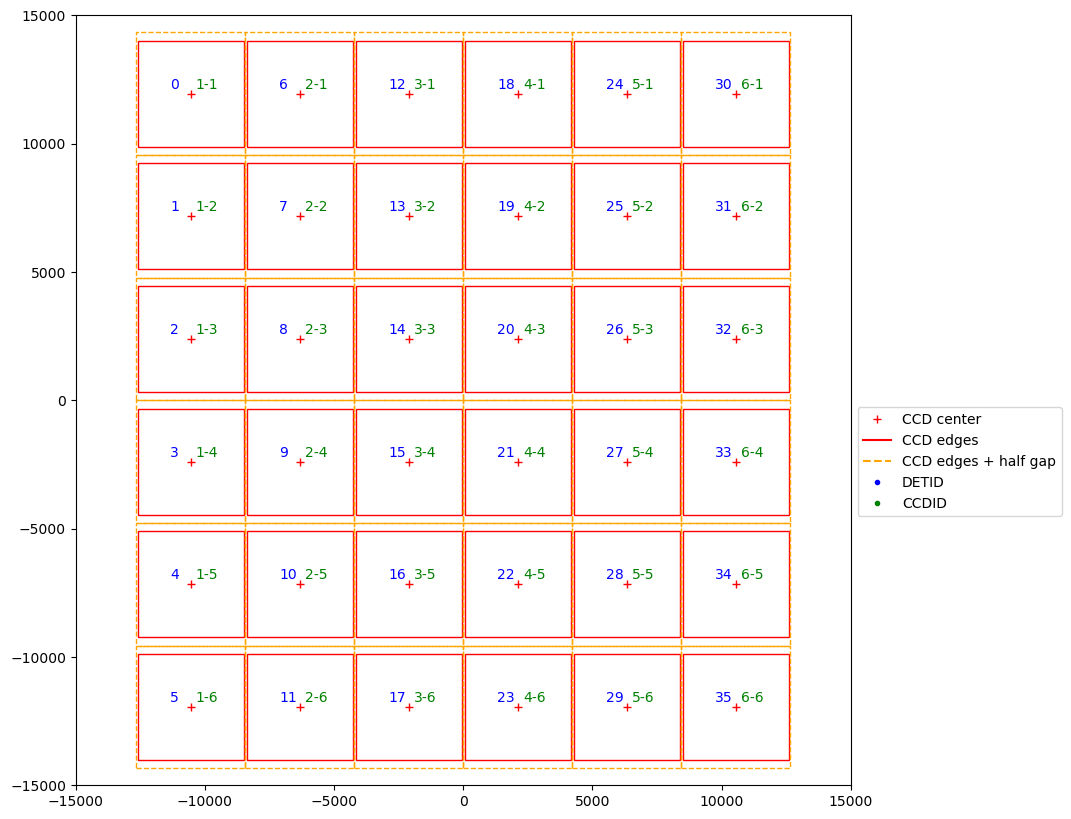

In [4]:
# min_x_pix, max_x_pix, min_y_pix, max_y_pix

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ccd_x, ccd_y, "+r")
for i in range(eul.instrument_params.n_ccd):

    w = int(ccd_layout_no_border[1][i] - ccd_layout_no_border[0][i]**2) + 1
    h = int(ccd_layout_no_border[3][i] - ccd_layout_no_border[2][i]**2) + 1
    rect_ref_x, rect_ref_y = ccd_x[i] - w/2, ccd_y[i] - h/2
    art = Rectangle((rect_ref_x, rect_ref_y), w, h, fill=False)
    art.set(color="r")
    ax.add_artist(art)

    w = int(ccd_layout_w_border[1][i] - ccd_layout_w_border[0][i]) + 1
    h = int(ccd_layout_w_border[3][i] - ccd_layout_w_border[2][i]) + 1
    rect_ref_x, rect_ref_y = ccd_x[i] - w/2, ccd_y[i] - h/2
    art = Rectangle((rect_ref_x, rect_ref_y), w, h, fill=False)
    art.set(color="orange", linestyle="--")
    ax.add_artist(art)

    plt.text(ccd_x[i]+200, ccd_y[i]+200, ccd_center["CCD_ID"][i], color="green")
    plt.text(ccd_x[i]-800, ccd_y[i]+200, i, color="b")

    plt.xlim(-15_000, 15_000)
    plt.ylim(-15_000, 15_000)

legend_elem = [
    plt.Line2D([0], [0], color="r", marker="+", linestyle="", label="CCD center"),
    plt.Line2D([0], [0], color="r", label="CCD edges"),
    plt.Line2D([0], [0], color="orange", linestyle="--", label="CCD edges + half gap"),
    plt.Line2D([0], [0], color="b", marker=".", linestyle="", label="DETID"),
    plt.Line2D([0], [0], color="g", marker=".", linestyle="", label="CCDID"),
]
ax.legend(handles=legend_elem, bbox_to_anchor=(1, 0.5))